## 3º Trabalho de Ciência de Dados - curso ICMC

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity

In [92]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

def corr_visualize(df):
    fig = plt.figure(figsize = (12,12))
    axs = fig.add_subplot(111)
    cmap = cm.get_cmap('Blues',30)

    labels = df.columns
    axs.set_xticklabels(labels, rotation= 30, fontsize = 15)
    axs.set_yticklabels(labels, rotation= 30, fontsize = 15)

    cax = axs.imshow(df.corr(), interpolation="nearest", cmap=cmap)

    fig.colorbar(cax)
    plt.show()

### Classificador Bayesiano paramétrico

In [181]:
# data - > dado a ser analisado
# h -> largura
# p -> porção dos dados a ser analisada

def bayes_parametrico(data, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    #p = 0.5 # fração dos dados que serão usados para treino
    x_train, x_test, y_train, y_test = train_test_split(x, target, train_size = p, random_state = 42)

    ## Matriz para armazenar as probabilidades de um dado pertencer aquela classe

    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 

    Pc = np.zeros(len(classes)) #fraction of elements in each class

    for i in np.arange(0, len(classes)):
        # retorna os elementos pertencentes a classe
        elements = tuple(np.where(y_train == classes[i]))
        
        # calcula a probabilidade de pertencer a essa classe
        Pc[i] = len(elements)/len(y_train) 

        # recebe os atributos dos elementos daquela classe e calcula a média
        
        Z = x_train[elements,:][0]
        m = np.mean(Z, axis = 0)

        # Calcula a matriz de covariancia dos atributos
        cv = np.cov(np.transpose(Z))


        for j in np.arange(0,x_test.shape[0]):
            x = x_test[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    for i in range(x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    #print(y_pred)
    score = accuracy_score(y_pred, y_test)
    return score

### Classificador Bayesiano não paramétrico

In [182]:
# data - > dado a ser analisado
# h -> largura
# p -> porção dos dados a ser analisada

def bayes_nao_parametrico(data, h, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    #p = 0.5 # fração dos dados que serão usados para treino
    x_train, x_test, y_train, y_test = train_test_split(x, target, train_size = p, random_state = 42)

    ## Matriz para armazenar as probabilidades de um dado pertencer aquela classe

    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
    
    Pc = np.zeros(len(classes)) #fraction of elements in each class

    for i in np.arange(0, len(classes)):
        # retorna os elementos pertencentes a classe
        elements = tuple(np.where(y_train == classes[i]))
        
        # calcula a probabilidade de pertencer a essa classe
        Pc[i] = len(elements)/len(y_train) 

        # recebe os atributos dos elementos daquela classe e calcula a média
        
        Z = x_train[elements,:][0]
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    for i in range(x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    #print(y_pred)
    score = accuracy_score(y_pred, y_test)
    #print('Acuracia:', score)
    return score

### Função para normalizar os dados e fazer o conjunto de treino e teste

In [183]:
def norm_data(data, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    return train_test_split(x, target, train_size = p, random_state = 42)

## Exercício 1
### Análise conjunto de dados Heart Disease UCI

Link: https://www.kaggle.com/ronitf/heart-disease-uci

In [185]:
## Leitura dos dados
data = pd.read_csv('../data/heart.csv')

In [190]:
## Infos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [191]:
## Descrição do conjunto de dados
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [192]:
## colunas
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Comparativo das acurácias para o conjunto de dados HD

Modelos usados:

1) Navie-Bayes Bernoulli

2) Navie-Bayes Gaussiano

3) Bayes paramétrico

4) Bayes não paramétrico

In [189]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = norm_data(data, 0.75) 

model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Classificador :\t Acurácia')
print('NB Bernoulli:', score)


model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('NB Gaussian:', score)

score = bayes_nao_parametrico(data,0.8,0.75)
print('B. não paramétrico:', score)

score = bayes_parametrico(data,0.75)
print('B. paramétrico:', score)

Classificador :	 Acurácia
NB Bernoulli: 0.8552631578947368
NB Gaussian: 0.881578947368421
B. não paramétrico: 0.8157894736842105
B. paramétrico: 0.8289473684210527


## Exercício 2
### Efeito $h$ no classificador não paramétrico dos dados Pima Indians Diabetes Database

Link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [10]:
## Leitura dos dados
data = pd.read_csv('../data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


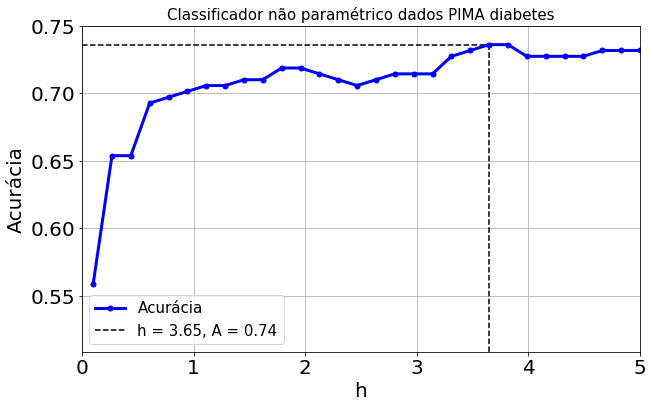

In [52]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

acur = []
h_values = np.linspace(0.1,5,30)

for h in h_values:
    score = bayes_nao_parametrico(data, h, 0.7)
    acur.append(score)   
    
fig, axs = plt.subplots(figsize = (10,6))


idmax = acur.index(max(acur)) 
axs.vlines(h_values[idmax], min(acur)-0.05,max(acur),linestyle = '--', label = 'h = {}, A = {}'.format(np.round(h_values[idmax],2), np.round(max(acur),2)), color = 'black')
axs.hlines(max(acur), 0,h_values[idmax],linestyle = '--', color = 'black')


axs.plot(h_values, acur, 'o-', color = 'blue', linewidth = 3, markersize = 5, label = 'Acurácia')

axs.set_title('Classificador não paramétrico dados PIMA diabetes', fontsize = 15)
axs.set_ylabel('Acurácia', fontsize = 20)
axs.set_xlabel('h', fontsize = 20)


plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#axs.set_yscale('log')

plt.ylim(min(acur) - 0.05,0.75)
plt.xlim(0,max(h_values))

axs.legend(fontsize = 15)
plt.grid()
plt.show()

## Exercício 3
### Verificando o efeito do ruído de um conjunto de dados simulado com make_moons na acurácia dos classificadores NB e Bayes paramétrico e não paramétrico

[]

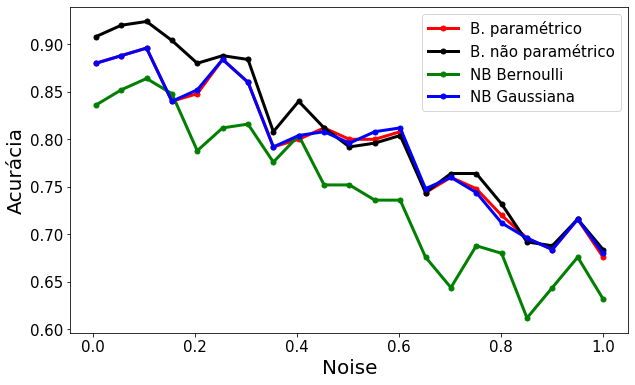

In [93]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


n_samples = 1000

noise = np.linspace(0.005,1,21)
bnp = []
bp = []
nbber = []
nbgauss = []
nbmul = []
for n in noise:
    data = datasets.make_moons(n_samples=n_samples, noise = n)
    X = data[0]
    y = data[1]
    df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})
    score = bayes_nao_parametrico(df,0.8,0.75)
    bnp.append(score)
    
    score = bayes_parametrico(df,0.8,0.75)
    bp.append(score)
    
    x_train, x_test, y_train, y_test = norm_data(df, 0.75) 

    model1 = BernoulliNB()
    model1.fit(x_train, y_train)
    
    model2 = GaussianNB()
    model2.fit(x_train, y_train)
    
    y_pred1 = model1.predict(x_test)
    score = accuracy_score(y_pred1, y_test)
    nbber.append(score)
    
    y_pred2 = model2.predict(x_test)
    score = accuracy_score(y_pred2, y_test)
    nbgauss.append(score)
    
fig,axs = plt.subplots(figsize = (10,6))

axs.plot(noise, bp, 'o-', linewidth = 3, markersize = 5, label = 'B. paramétrico', color = 'red')
axs.plot(noise, bnp, 'o-', linewidth = 3, markersize = 5, label = 'B. não paramétrico', color = 'black')
axs.plot(noise, nbber, 'o-', linewidth = 3, markersize = 5, label = 'NB Bernoulli', color = 'green')
axs.plot(noise, nbgauss, 'o-', linewidth = 3, markersize = 5, label = 'NB Gaussiana', color = 'blue')


axs.set_xlabel('Noise', fontsize = 20)
axs.set_ylabel('Acurácia', fontsize = 20)
axs.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#axs.set_yscale('log')
plt.plot()

## Exercício 4

### Regiões de decisão em diferentes classificadores para um conjunto de dados simulado com make_moons

Acurácia  Regressão Logistica  =  0.884
Acurácia  KNN  =  0.916
Acurácia  N-B Gaussian  =  0.888
Acurácia  N-B Bernoulli  =  0.812


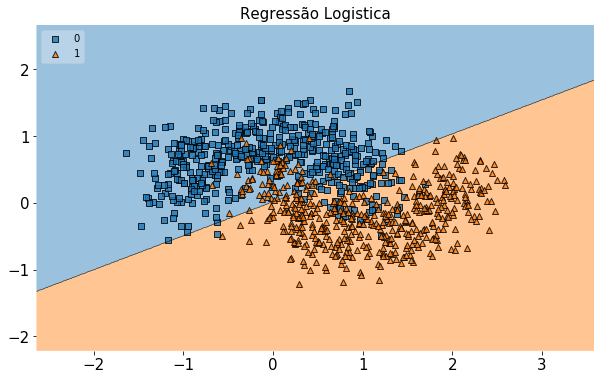

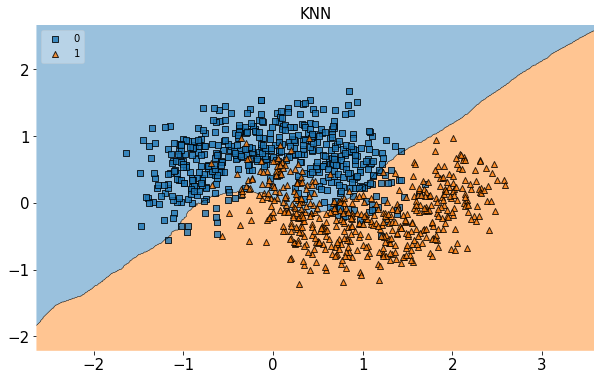

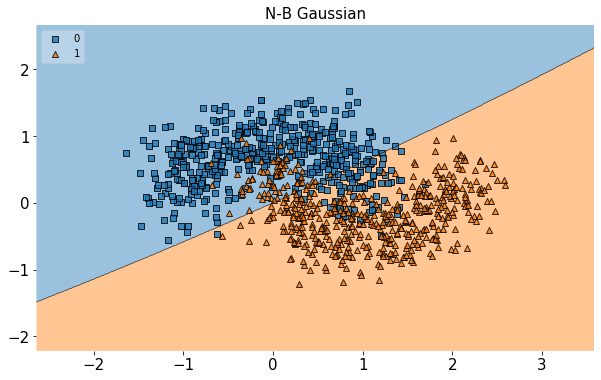

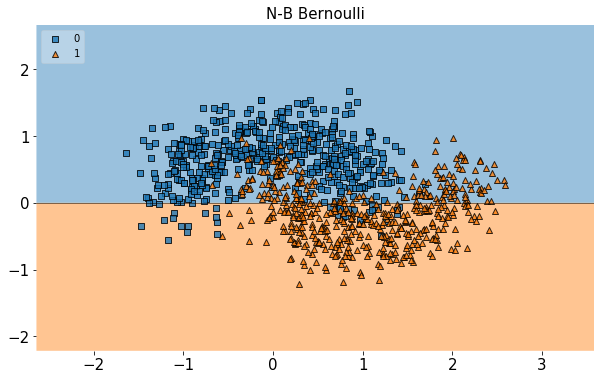

In [127]:
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise = 0.3)
X = data[0]
y = data[1]
df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})


x_train, x_test, y_train, y_test = norm_data(df, 0.75) 
models = [LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000),KNeighborsClassifier(n_neighbors = 150), GaussianNB(), BernoulliNB()]
titles = ['Regressão Logistica', 'KNN', 'N-B Gaussian', 'N-B Bernoulli']
for model,title in zip(models, titles):
    #model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    #model = KNeighborsClassifier(n_neighbors = 150)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)

    
    fig,axs = plt.subplots(figsize = (10,6))
    axs.set_title(title, fontsize = 15)
    print('Acurácia ',title,' = ', score)
    plot_decision_regions(X, y, clf=model, legend=2)
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

## Exercício 5
### Efeito da distância entre os centros do conjunto de dados na acurácia dos classificadores NB gaussiano e Bayes paramétrico

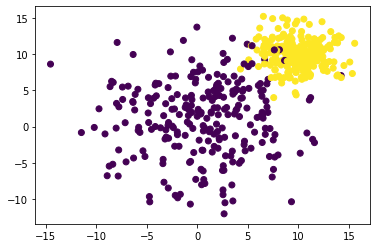

In [143]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


n = 500
r1 = (1,1)
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= c)

df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1], 'y': y})

x_train, x_test, y_train, y_test = norm_data(df, 0.75)
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)


plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)

In [144]:
def dist(x1,x2):
    return np.sqrt((x2[0]-x1[0])**2 + (x2[1]-x2[1])**2)

(0, 18.5)

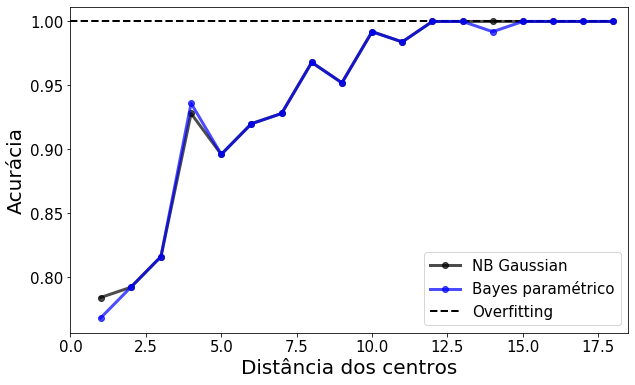

In [177]:
acur_nbg = []
acur_bp = []
distancia = []
n = 500
r1 = (1,1)

#c = [r1, (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class

for xi,yi in zip(np.arange(2,20), np.arange(2,20)):
    c = [r1,(xi,yi)]
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= c)

    df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1], 'y': y})

    x_train, x_test, y_train, y_test = norm_data(df, 0.75)
    
    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    acur_nbg.append(score)
    
    bp = bayes_parametrico(df, 0.8, 0.75)
    acur_bp.append(bp)
    
    d = dist(c[0],c[1])
    distancia.append(d)

fig,axs = plt.subplots(figsize = (10,6))


axs.plot(distancia, acur_nbg, 'o-', label = 'NB Gaussian', color = 'black', linewidth = 3, alpha = 0.7)
axs.plot(distancia, acur_bp, 'o-', label = 'Bayes paramétrico', color = 'blue', linewidth = 3, alpha = 0.7)
axs.hlines(1, 0, max(distancia),linestyle = '--', linewidth = 2, label = 'Overfitting')


axs.set_ylabel('Acurácia', fontsize = 20)
axs.set_xlabel('Distância dos centros', fontsize = 20)

axs.legend(fontsize = 15, loc = 'lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(0,max(distancia)+0.5)

## Exercício 6


[]

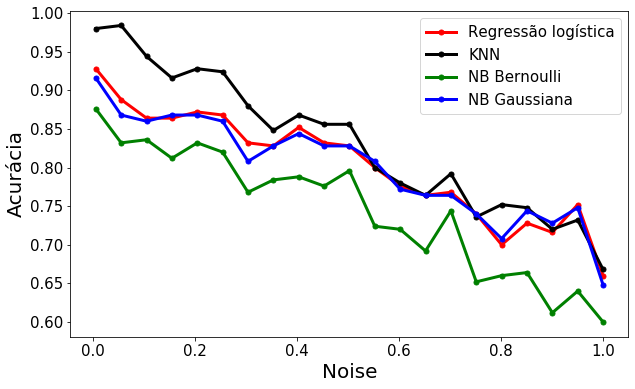

In [194]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


n_samples = 1000

noise = np.linspace(0.005,1,21)
knn = []
rl = []
nbber = []
nbgauss = []
nbmul = []
for n in noise:
    data = datasets.make_moons(n_samples=n_samples, noise = n)
    X = data[0]
    y = data[1]
    df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})
    
    
    x_train, x_test, y_train, y_test = norm_data(df, 0.75) 

    model1 = BernoulliNB()
    model1.fit(x_train, y_train)
    
    model2 = GaussianNB()
    model2.fit(x_train, y_train)
    
    model3 = KNeighborsClassifier(n_neighbors = 150)
    model3.fit(x_train,y_train)
    
    model4 = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model4.fit(x_train,y_train)
    
    y_pred1 = model1.predict(x_test)
    score = accuracy_score(y_pred1, y_test)
    nbber.append(score)
    
    y_pred2 = model2.predict(x_test)
    score = accuracy_score(y_pred2, y_test)
    nbgauss.append(score)
    
    y_pred3 = model3.predict(x_test)
    score = accuracy_score(y_pred3, y_test)
    knn.append(score)
    
    y_pred4 = model4.predict(x_test)
    score = accuracy_score(y_pred4, y_test)
    rl.append(score)
    
fig,axs = plt.subplots(figsize = (10,6))

axs.plot(noise, rl, 'o-', linewidth = 3, markersize = 5, label = 'Regressão logística', color = 'red')
axs.plot(noise, knn, 'o-', linewidth = 3, markersize = 5, label = 'KNN', color = 'black')
axs.plot(noise, nbber, 'o-', linewidth = 3, markersize = 5, label = 'NB Bernoulli', color = 'green')
axs.plot(noise, nbgauss, 'o-', linewidth = 3, markersize = 5, label = 'NB Gaussiana', color = 'blue')


axs.set_xlabel('Noise', fontsize = 20)
axs.set_ylabel('Acurácia', fontsize = 20)
axs.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#axs.set_yscale('log')
plt.plot()

## Exercício 8

### a) Dados Vehicle

#### Pré-processamento dos dados

In [114]:
## Leitura do conjunto de dados

df = pd.read_csv('../data/Vehicle.csv')
df.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


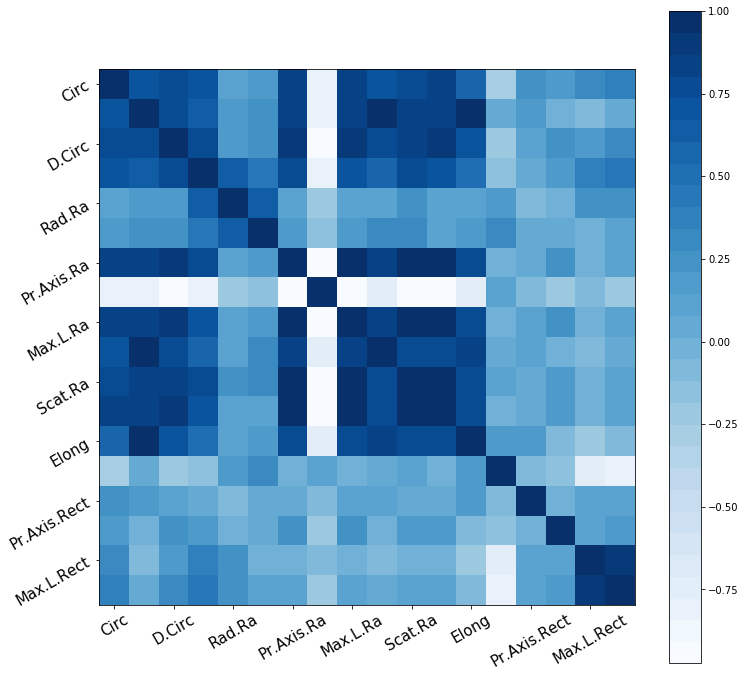

In [115]:
corr_visualize(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comp          846 non-null    int64 
 1   Circ          846 non-null    int64 
 2   D.Circ        846 non-null    int64 
 3   Rad.Ra        846 non-null    int64 
 4   Pr.Axis.Ra    846 non-null    int64 
 5   Max.L.Ra      846 non-null    int64 
 6   Scat.Ra       846 non-null    int64 
 7   Elong         846 non-null    int64 
 8   Pr.Axis.Rect  846 non-null    int64 
 9   Max.L.Rect    846 non-null    int64 
 10  Sc.Var.Maxis  846 non-null    int64 
 11  Sc.Var.maxis  846 non-null    int64 
 12  Ra.Gyr        846 non-null    int64 
 13  Skew.Maxis    846 non-null    int64 
 14  Skew.maxis    846 non-null    int64 
 15  Kurt.maxis    846 non-null    int64 
 16  Kurt.Maxis    846 non-null    int64 
 17  Holl.Ra       846 non-null    int64 
 18  Class         846 non-null    object
dtypes: int64

In [14]:
df.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [17]:
classes = df[df.columns[-1]].unique()
print('Classes:', classes)

Classes: ['van' 'saab' 'bus' 'opel']


In [21]:
data = df.to_numpy()

X = data[:,:-1]
y = data[:,-1]

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Data norm.')
print('Mean : ',X.mean(axis = 0),'\nStd :', X.std(axis = 0))

Data norm.
Mean :  [-8.39885030e-18 -1.04985629e-17  8.39885030e-18  1.25982755e-17
  4.19942515e-18 -6.29913773e-18  8.39885030e-18 -1.67977006e-17
  1.25982755e-17 -8.39885030e-18 -6.29913773e-18  8.39885030e-18
 -6.29913773e-18 -1.25982755e-17 -1.25982755e-17 -1.25982755e-17
  8.39885030e-18  4.19942515e-18] 
Std : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
from sklearn.model_selection import train_test_split

p = 0.7

x_train,x_test,y_train,y_test = train_test_split(X, y, train_size = p, random_state = 42)

#### Avaliação dos classificadores

In [47]:
## KNN - vizinhos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : np.arange(1,30),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )
gs_results = gs.fit(x_train,y_train)


Fitting 3 folds for each of 174 candidates, totalling 522 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 522 out of 522 | elapsed:    3.7s finished


In [50]:
print('Best scores: ', gs_results.best_score_)
print('Best estimator: ', gs_results.best_estimator_)
print('Best params: ', gs_results.best_params_)

Best scores:  0.7246491992684886
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')
Best params:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [130]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

metrics = ['Acurácia', 'Precisão', 'F1', 'AUC']

clfs = [GaussianNB(), BernoulliNB(), KNeighborsClassifier(n_neighbors = 10, weights = 'distance', p = 2, metric = 'manhattan')]
clf_names = ['NB-Gaussian','NB-Bernoulli', 'KNN']
acurs = [];f1s = []; precs = [];
for clf in clfs:
    model = clf
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    acurs.append(acur);f1s.append(f1); precs.append(prec);
    
score_values = pd.DataFrame({'Classificador':clf_names,metrics[0]:acurs, metrics[1]:f1s, metrics[2]: precs})
score_values

,Classificador,Acurácia,Precisão,F1
0,NB-Gaussian,0.537500,0.535281,0.537389
1,NB-Bernoulli,0.564583,0.583300,0.610131
2,KNN,0.625000,0.637701,0.652824


#### b) Winequality-red

In [83]:
import pandas as pd

df = pd.read_csv('../data/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [85]:
classes = df[df.columns[-1]].unique()

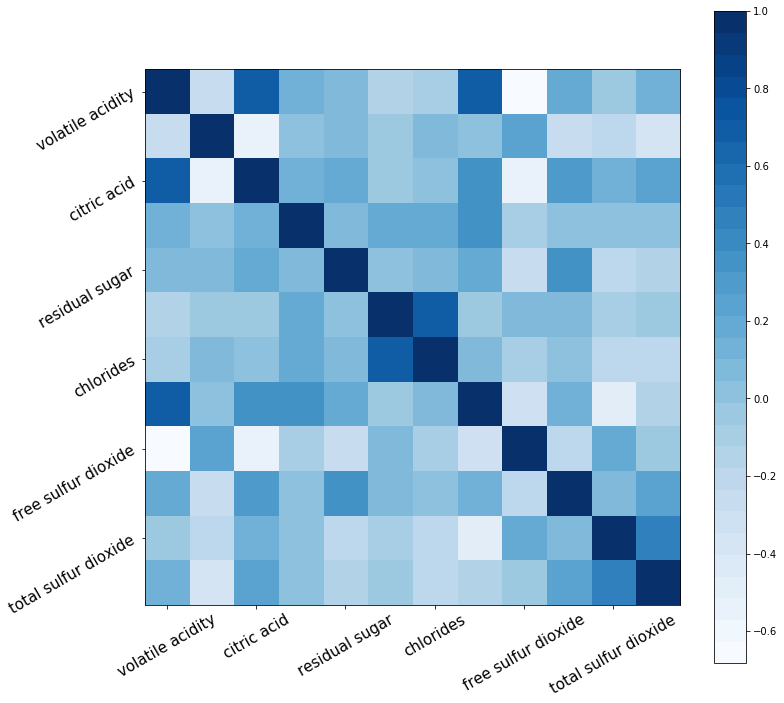

In [95]:
# correlação entre o conjunto de dados

corr_visualize(df)

In [98]:
## Normalizando o conjunto de dados

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gd_params = {
    'n_neighbors':np.arange(1,30),
    'metric':['euclidean','manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    gd_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1,
)

grid_res = gs.fit(x_train,y_train)


print('Melhor pontuação:', grid_res.best_score_)
print('Estimador:', grid_res.best_estimator_)
print('Parametros:', grid_res.best_params_)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s


Melhor pontuação: 0.5924932975871314
Estimador: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')
Parametros: {'metric': 'euclidean', 'n_neighbors': 16}


[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    4.0s finished


In [117]:
## Importante classificadores
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
## Importando métricas
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

metrics = ['Acurácia', 'Precisão', 'F1', 'AUC']

models = [BernoulliNB(), GaussianNB(), KNeighborsClassifier(n_neighbors = 16, p = 2, metric = 'euclidean')]
labels = ['NB-Bernoulli','NB-Gaussian', 'KNN']

acur_scores, f1_scores, prec_scores = [],[],[];

for mod in models:
    model = mod
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    acur_scores.append(acur);f1_scores.append(f1); prec_scores.append(prec);

data = {
    metrics[0]:labels,
    metrics[1]:acur_scores,
    metrics[2]:f1_scores,
    metrics[3]:prec_scores,
}
df = pd.DataFrame(data)
df

,Acurácia,Precisão,F1,AUC
0,NB-Bernoulli,0.564583,0.583300,0.610131
1,NB-Gaussian,0.537500,0.535281,0.537389
2,KNN,0.554167,0.573399,0.598053
